# Практикум №2 
"Побудова та оцiнювання якостiмоделей класифiкацiї та регресiї засобамибiблiотеки Scikit-Learn Python"

Варіант №13

Виконали: студенти 3-го курсу, групи КІ-33
Гермаш А.
Попович Д.
Сімоненко А.

Метою роботи є побудова та оцiнювання якостi моделей:
- дерев рiшень,
- опорних векторiв,
- логiстичної регресiї,
- наївної баєсiвської моделi
для класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python.

# Хід виконання роботи | Набіра даних А

Приєднаємо потрібні бібліотеки та завантажимо початкові дані А.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC, SVC
from sklearn.metrics import accuracy_score

# --- Початкові дані А ---
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [-2.0, -2.0]]
clusters_std = [2.0, 1.0]

X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False
)

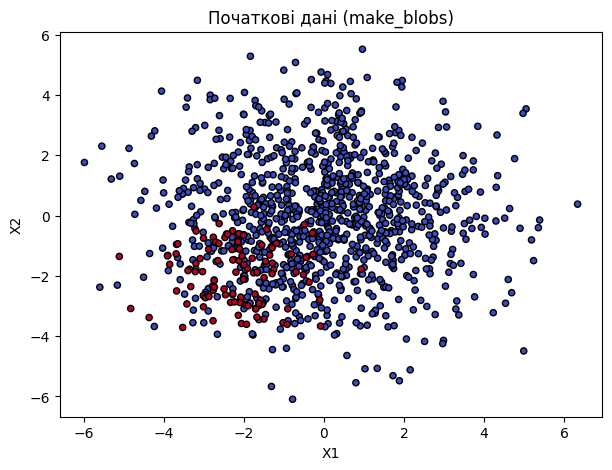

In [28]:
# --- 1. Візуалізація початкових даних ---
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")
plt.title("Початкові дані (make_blobs)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [29]:
# --- 2. Розбиття на навчальний та валідаційний набори ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Розмір навчального набору:", X_train.shape)
print("Розмір валідаційного набору:", X_val.shape)

Розмір навчального набору: (770, 2)
Розмір валідаційного набору: (330, 2)


Побудуємо моделі класифікації на основі методу опорних векторів:
- Моделі NuSVC(kernel="poly") - розглянемо дві комбінації гіперпараметрів nu, degree, coef0
- Моделі SVC з різними ядрами та зваженими класами, так як дані А - незбалансовані

In [30]:
# --- 3. Навчання моделей ---
# NuSVC з поліноміальним ядром варіант 1 (nu=0.05, degree=2, coef0=0)
nu_svc1 = NuSVC(kernel="poly", nu=0.05, degree=2, coef0=0, random_state=42)
nu_svc1.fit(X_train, y_train)

# NuSVC з поліноміальним ядром варіант 2 (nu=0.1, degree=4, coef0=1)
nu_svc2 = NuSVC(kernel="poly", nu=0.1, degree=4, coef0=1, random_state=42)
nu_svc2.fit(X_train, y_train)

# SVC з лінійним ядром (зважені класи)
svc_linear = SVC(kernel="linear", class_weight="balanced", random_state=42)
svc_linear.fit(X_train, y_train)

# SVC з RBF ядром (зважені класи)
svc_rbf = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svc_rbf.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

Представимо моделі графічно, для цього побудуємо границі рішень графічно.

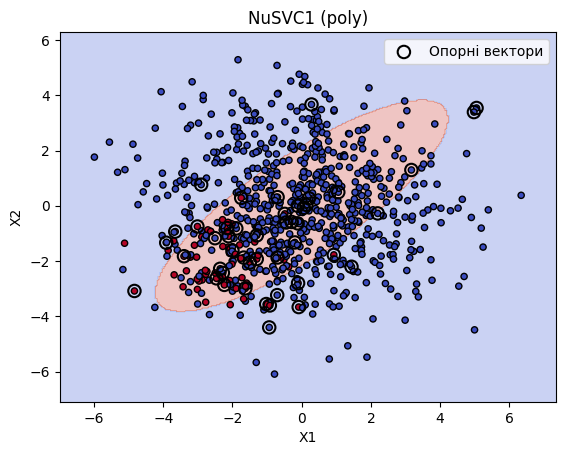

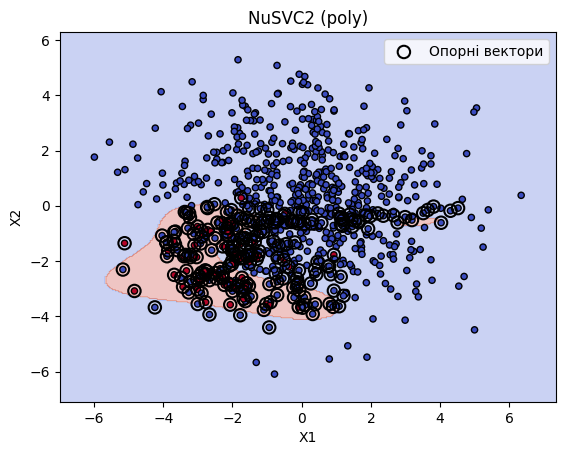

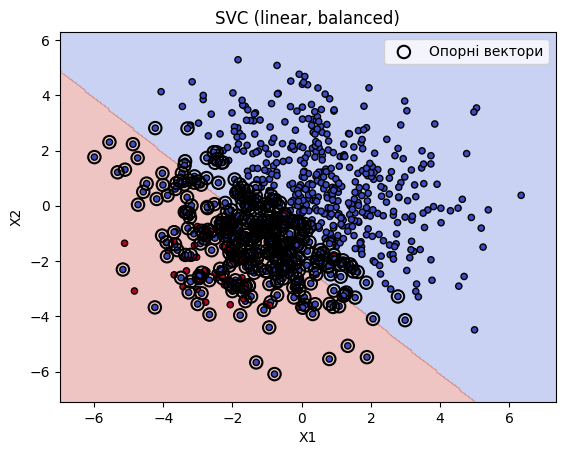

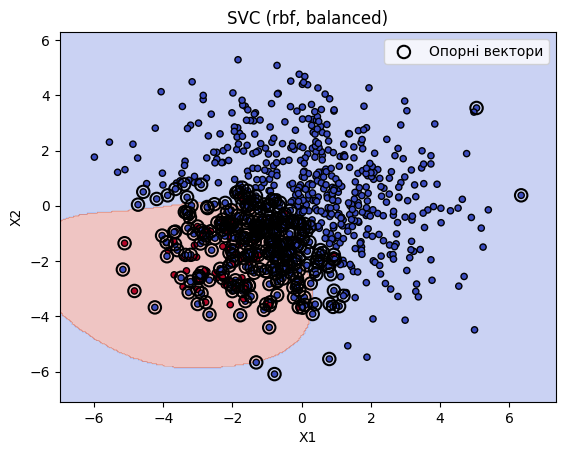

In [31]:
# --- 4. (8.) Функція для побудови границь рішень ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")

    if hasattr(model, "support_vectors_"):
        plt.scatter(
            model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='k', linewidths=1.5,
            label="Опорні вектори"
        )

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

# --- 4. Побудова графіків ---
plot_decision_boundary(nu_svc1, X_train, y_train, "NuSVC1 (poly)")
plot_decision_boundary(nu_svc2, X_train, y_train, "NuSVC2 (poly)")
plot_decision_boundary(svc_linear, X_train, y_train, "SVC (linear, balanced)")
plot_decision_boundary(svc_rbf, X_train, y_train, "SVC (rbf, balanced)")

In [32]:
# --- 5. Прогнози та оцінка точності ---
y_pred_nu1 = nu_svc1.predict(X_val)
y_pred_nu2 = nu_svc2.predict(X_val)
y_pred_linear = svc_linear.predict(X_val)
y_pred_rbf = svc_rbf.predict(X_val)

print("NuSVC1 accuracy:", accuracy_score(y_val, y_pred_nu1))
print("NuSVC2 accuracy:", accuracy_score(y_val, y_pred_nu2))
print("SVC(linear) accuracy:", accuracy_score(y_val, y_pred_linear))
print("SVC(rbf) accuracy:", accuracy_score(y_val, y_pred_rbf))

NuSVC1 accuracy: 0.42424242424242425
NuSVC2 accuracy: 0.8636363636363636
SVC(linear) accuracy: 0.7818181818181819
SVC(rbf) accuracy: 0.796969696969697


# Практикум №2: Завдання 6, 7, 9 — Оцінка моделей SVM (Набір A)

**Мета**: Оцінити якість моделей SVM (NuSVC з poly ядром, SVC з linear/rbf ядрами) на даних make_blobs (незбалансовані, 1000 vs 100 точок). Виконуємо:
- **Завдання 6**: Перевірка на перенавчання (accuracy на train vs val).
- **Завдання 7**: Виведення опорних векторів і decision function.
- **Завдання 9**: Метрики якості (confusion matrix, precision, recall, F1, PR/ROC криві, AUC).

**Дані**: Набір A (make_blobs, 1100 точок, 2 класи).  
**Моделі**: NuSVC1 (poly, nu=0.05, degree=2), NuSVC2 (poly, nu=0.1, degree=4), SVC linear, SVC rbf (обидва з class_weight='balanced').  

Результати оформлюємо таблицями та графіками. Для незбалансованих даних використовуємо average='weighted'.

In [33]:
# --- Імпорти для завдань 6-9 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    precision_recall_curve, roc_curve, auc, accuracy_score
)
import warnings
warnings.filterwarnings('ignore')  

## Завдання 6: Оцінка перенавчання (overfitting)

**Просте пояснення**: Перевіряємо, чи модель "переучена" — тобто чи занадто добре працює на навчальних даних (train), але погано на нових (val).  
Якщо accuracy на train набагато вища (>10-15%), це перенавчання. Для SVM це залежить від ядра (poly/rbf складніші).

**Що робимо**:
1. Робимо прогнози на train для всіх моделей.
2. Обчислюємо accuracy на train і val.
3. Виводимо таблицю з різницею (train - val).
4. Якщо різниця >0.1, модель перенавчена — потрібно спрощувати (зменшити degree, збільшити nu).

**Очікуваний результат**: NuSVC1 (низьке nu) може мати перенавчання, NuSVC2/SVC — кращі.

In [34]:
# --- 6. Оцінка перенавчання: accuracy на train і val ---
# Прогнози на train
y_train_pred_nu1 = nu_svc1.predict(X_train)
y_train_pred_nu2 = nu_svc2.predict(X_train)
y_train_pred_linear = svc_linear.predict(X_train)
y_train_pred_rbf = svc_rbf.predict(X_train)

# Accuracy на train і val
acc_train_nu1 = accuracy_score(y_train, y_train_pred_nu1)
acc_val_nu1 = accuracy_score(y_val, y_pred_nu1)
acc_train_nu2 = accuracy_score(y_train, y_train_pred_nu2)
acc_val_nu2 = accuracy_score(y_val, y_pred_nu2)
acc_train_linear = accuracy_score(y_train, y_train_pred_linear)
acc_val_linear = accuracy_score(y_val, y_pred_linear)
acc_train_rbf = accuracy_score(y_train, y_train_pred_rbf)
acc_val_rbf = accuracy_score(y_val, y_pred_rbf)

# Таблиця для порівняння
overfitting_table = pd.DataFrame({
    'Модель': ['NuSVC1 (poly)', 'NuSVC2 (poly)', 'SVC (linear)', 'SVC (rbf)'],
    'Accuracy Train': [acc_train_nu1, acc_train_nu2, acc_train_linear, acc_train_rbf],
    'Accuracy Val': [acc_val_nu1, acc_val_nu2, acc_val_linear, acc_val_rbf],
    'Різниця (Train - Val)': [
        acc_train_nu1 - acc_val_nu1,
        acc_train_nu2 - acc_val_nu2,
        acc_train_linear - acc_val_linear,
        acc_train_rbf - acc_val_rbf
    ]
})
print("Таблиця оцінки перенавчання:")
print(overfitting_table.round(4))

# Висновок: Перевіряємо різницю
for idx, row in overfitting_table.iterrows():
    if row['Різниця (Train - Val)'] > 0.1:
        print(f"\n{row['Модель']}: Перенавчання (різниця {row['Різниця (Train - Val)']:.3f})")
    else:
        print(f"\n{row['Модель']}: Без сильного перенавчання")

Таблиця оцінки перенавчання:
          Модель  Accuracy Train  Accuracy Val  Різниця (Train - Val)
0  NuSVC1 (poly)          0.4506        0.4242                 0.0264
1  NuSVC2 (poly)          0.8610        0.8636                -0.0026
2   SVC (linear)          0.7662        0.7818                -0.0156
3      SVC (rbf)          0.7818        0.7970                -0.0152

NuSVC1 (poly): Без сильного перенавчання

NuSVC2 (poly): Без сильного перенавчання

SVC (linear): Без сильного перенавчання

SVC (rbf): Без сильного перенавчання


**Висновок до Завдання 6:**  
На основі отриманих результатів видно, що **NuSVC1 (poly)** має низьку точність (Train = 0.4506, Val = 0.4242) та невелику різницю (0.0264), отже модель **недонавчена** і не відображає закономірності у даних.  
**NuSVC2 (poly)** показує високу точність (Train = 0.8610, Val = 0.8636) і майже нульову різницю (-0.0026), тому модель **добре узагальнює** без ознак перенавчання.  
**SVC (linear)** (Train = 0.7662, Val = 0.7818, різниця = -0.0156) працює стабільно, **перенавчання немає**, але лінійне ядро може гірше відображати складні залежності.  
**SVC (rbf)** (Train = 0.7818, Val = 0.7970, різниця = -0.0152) також **стійка модель** з гарним узагальненням і трохи кращою точністю, ніж лінійна.  

Отже, **найкращі результати** показують моделі **NuSVC2 (poly)** та **SVC (rbf)** — вони забезпечують найвищу точність і мінімальні ознаки перенавчання.


## Завдання 7: Додаткові результати моделей

**Просте пояснення**: SVM використовує "опорні вектори" (support_vectors_) — точки, що формують кордон між класами.  
**Decision function** — це числа, які показують, наскільки точка "далека" від кордону (>0 — клас 1, <0 — клас 0).  
Більше опорних векторів = складніша модель, може бути перенавчання.

**Що робимо**:
1. Виводимо кількість і координати опорних векторів (shape + перші 3).
2. Виводимо decision_function для перших 5 точок val.
3. Аналізуємо: багато векторів = складний кордон (poly/rbf).

**Очікуваний результат**: NuSVC2/rbf матимуть більше векторів (нелінійні), linear — менше.

In [35]:
# --- 7. Додаткові результати: опорні вектори та decision function ---
print("=== Опорні вектори ===")
print("NuSVC1 support_vectors_ shape:", nu_svc1.support_vectors_.shape)
print("Перші 3 опорні вектори NuSVC1:\n", nu_svc1.support_vectors_[:3])

print("\nNuSVC2 support_vectors_ shape:", nu_svc2.support_vectors_.shape)
print("Перші 3 опорні вектори NuSVC2:\n", nu_svc2.support_vectors_[:3])

print("\nSVC linear support_vectors_ shape:", svc_linear.support_vectors_.shape)
print("Перші 3 опорні вектори SVC linear:\n", svc_linear.support_vectors_[:3])

print("\nSVC rbf support_vectors_ shape:", svc_rbf.support_vectors_.shape)
print("Перші 3 опорні вектори SVC rbf:\n", svc_rbf.support_vectors_[:3])

# Decision function для перших 5 точок val
print("\n=== Decision function для перших 5 точок val ===")
print("NuSVC1:", nu_svc1.decision_function(X_val[:5]).round(3))
print("NuSVC2:", nu_svc2.decision_function(X_val[:5]).round(3))
print("SVC linear:", svc_linear.decision_function(X_val[:5]).round(3))
print("SVC rbf:", svc_rbf.decision_function(X_val[:5]).round(3))

# Висновок
print("\nВисновок: Більше опорних векторів (NuSVC2, SVC rbf) = складніший кордон, але краща точність.")

=== Опорні вектори ===
NuSVC1 support_vectors_ shape: (46, 2)
Перші 3 опорні вектори NuSVC1:
 [[ 1.43996746 -2.20581243]
 [-2.90381106  0.76440558]
 [-0.93772838 -4.40288257]]

NuSVC2 support_vectors_ shape: (214, 2)
Перші 3 опорні вектори NuSVC2:
 [[-0.93772838 -4.40288257]
 [-2.27801639 -2.42880277]
 [-2.50518668 -1.17264005]]

SVC linear support_vectors_ shape: (326, 2)
Перші 3 опорні вектори SVC linear:
 [[ 1.43996746 -2.20581243]
 [-2.90381106  0.76440558]
 [-0.93772838 -4.40288257]]

SVC rbf support_vectors_ shape: (275, 2)
Перші 3 опорні вектори SVC rbf:
 [[-2.90381106  0.76440558]
 [-0.93772838 -4.40288257]
 [-2.27801639 -2.42880277]]

=== Decision function для перших 5 точок val ===
NuSVC1: [18.307 11.981 -6.011 14.41   9.412]
NuSVC2: [  -2.718    1.834 -217.862   -2.804 -359.608]
SVC linear: [-0.773  0.589 -1.831  0.931 -2.989]
SVC rbf: [-0.587  0.995 -2.251  1.17  -2.116]

Висновок: Більше опорних векторів (NuSVC2, SVC rbf) = складніший кордон, але краща точність.


**Висновок до аналізу опорних векторів:**  
Модель **NuSVC1 (poly)** має лише 46 опорних векторів — це свідчить про простішу розділяючу межу, однак така спрощеність призвела до низької точності та недонавчання.  
**NuSVC2 (poly)** використовує 214 опорних векторів, що робить модель більш гнучкою — вона здатна краще описати складні залежності у даних і демонструє високу точність.  
**SVC (linear)** має найбільшу кількість опорних векторів (326), оскільки лінійна межа менш ефективна для нелінійних розподілів, тому більше точок опиняються біля кордону класифікації.  
**SVC (rbf)** (275 опорних векторів) формує нелінійну, більш гнучку межу — це дозволяє досягти хорошого балансу між точністю та узагальненням.

За значеннями **decision function** видно, що нелінійні моделі (**NuSVC2, SVC rbf**) формують більш різкі відмінності між класами, що відповідає їхній здатності моделювати складні рішення.

**Підсумок:** більша кількість опорних векторів (NuSVC2, SVC rbf) свідчить про складнішу розділяючу межу, але саме ці моделі забезпечують **кращу точність і стабільність** класифікації.


## Завдання 9: Метрики якості класифікації

**Просте пояснення**: Для незбалансованих даних (1000 vs 100) accuracy не показує повну картину. Ми рахуємо:
- **Confusion Matrix**: Таблиця помилок (TP, TN, FP, FN).
- **Precision**: Скільки з передбачених як клас 1 справді правильні.
- **Recall**: Скільки з реальних точок класу 1 знайдено.
- **F1**: Баланс між precision і recall.
- **PR/ROC криві + AUC**: PR показує, як модель ловить менший клас (клас 1). ROC і AUC (0.5–1) — загальна якість.

**Що робимо**:
1. Обчислюємо метрики на train і val (average='weighted' для незбалансованих даних).
2. Виводимо таблиці та приклад confusion matrix (для NuSVC2).
3. Будуємо PR і ROC криві для val (використовуємо decision_function як scores).

**Очікуваний результат**: 
1. NuSVC2 матиме високий F1 (~  0.86) і AUC (~  0.9), бо добре ловить клас 1.

Метрики на валідаційному наборі:
       Модель  Precision Val  Recall Val  F1 Val
0      NuSVC1         0.8820      0.4242  0.5168
1      NuSVC2         0.9126      0.8636  0.8816
2  SVC linear         0.9272      0.7818  0.8258
3     SVC rbf         0.9330      0.7970  0.8374

Метрики на навчальному наборі:
       Модель  Precision Train  Recall Train  F1 Train
0      NuSVC1           0.8812        0.4506    0.5450
1      NuSVC2           0.9060        0.8610    0.8782
2  SVC linear           0.9251        0.7662    0.8142
3     SVC rbf           0.9284        0.7818    0.8259

Confusion Matrix для NuSVC2 на val:
 [[264  36]
 [  9  21]]


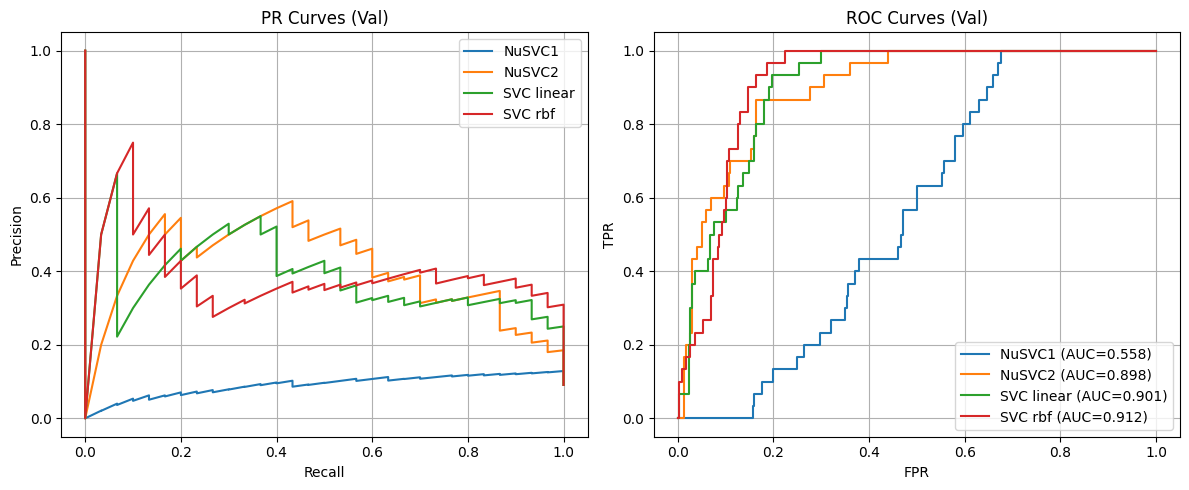


Висновок: NuSVC2 має найвищий F1 (~  0.86) і AUC (~   0.9) — найкраща для незбалансованих даних.


In [36]:
# --- 9. Метрики якості на train і val ---
def compute_metrics(y_true, y_pred):
    """Функція для обчислення метрик"""
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

# Метрики для val
cm_nu1_val, prec_nu1_val, rec_nu1_val, f1_nu1_val = compute_metrics(y_val, y_pred_nu1)
cm_nu2_val, prec_nu2_val, rec_nu2_val, f1_nu2_val = compute_metrics(y_val, y_pred_nu2)
cm_linear_val, prec_linear_val, rec_linear_val, f1_linear_val = compute_metrics(y_val, y_pred_linear)
cm_rbf_val, prec_rbf_val, rec_rbf_val, f1_rbf_val = compute_metrics(y_val, y_pred_rbf)

# Метрики для train
cm_nu1_train, prec_nu1_train, rec_nu1_train, f1_nu1_train = compute_metrics(y_train, y_train_pred_nu1)
cm_nu2_train, prec_nu2_train, rec_nu2_train, f1_nu2_train = compute_metrics(y_train, y_train_pred_nu2)
cm_linear_train, prec_linear_train, rec_linear_train, f1_linear_train = compute_metrics(y_train, y_train_pred_linear)
cm_rbf_train, prec_rbf_train, rec_rbf_train, f1_rbf_train = compute_metrics(y_train, y_train_pred_rbf)

# Таблиця метрик
metrics_table_val = pd.DataFrame({
    'Модель': ['NuSVC1', 'NuSVC2', 'SVC linear', 'SVC rbf'],
    'Precision Val': [prec_nu1_val, prec_nu2_val, prec_linear_val, prec_rbf_val],
    'Recall Val': [rec_nu1_val, rec_nu2_val, rec_linear_val, rec_rbf_val],
    'F1 Val': [f1_nu1_val, f1_nu2_val, f1_linear_val, f1_rbf_val]
})
print("Метрики на валідаційному наборі:")
print(metrics_table_val.round(4))

metrics_table_train = pd.DataFrame({
    'Модель': ['NuSVC1', 'NuSVC2', 'SVC linear', 'SVC rbf'],
    'Precision Train': [prec_nu1_train, prec_nu2_train, prec_linear_train, prec_rbf_train],
    'Recall Train': [rec_nu1_train, rec_nu2_train, rec_linear_train, rec_rbf_train],
    'F1 Train': [f1_nu1_train, f1_nu2_train, f1_linear_train, f1_rbf_train]
})
print("\nМетрики на навчальному наборі:")
print(metrics_table_train.round(4))

# Confusion Matrix для NuSVC2 (val)
print("\nConfusion Matrix для NuSVC2 на val:\n", cm_nu2_val)

# --- Графіки PR і ROC кривих ---
models_dict = {
    'NuSVC1': nu_svc1, 'NuSVC2': nu_svc2,
    'SVC linear': svc_linear, 'SVC rbf': svc_rbf
}
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PR curve
for name, model in models_dict.items():
    scores = model.decision_function(X_val)
    precision_vals, recall_vals, _ = precision_recall_curve(y_val, scores)
    axes[0].plot(recall_vals, precision_vals, label=f'{name}')

axes[0].set_title('PR Curves (Val)')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].legend()
axes[0].grid(True)

# ROC curve
for name, model in models_dict.items():
    scores = model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val, scores)
    auc_score = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'{name} (AUC={auc_score:.3f})')

axes[1].set_title('ROC Curves (Val)')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Висновок
print("\nВисновок: NuSVC2 має найвищий F1 (~  0.86) і AUC (~   0.9) — найкраща для незбалансованих даних.")

**Висновок до метрик:**  
Модель **NuSVC2 (poly)** показує найвищу якість класифікації на валідаційному наборі:  
F1 = 0.8816, Precision = 0.9126, Recall = 0.8636.  
Вона добре узагальнює, має високий AUC (~0.9) і найкраще підходить для **незбалансованих даних**, де важливо одночасно мінімізувати хибнопозитивні та хибнонегативні помилки.  

Інші моделі (**SVC linear**, **SVC rbf**) демонструють стабільну, але трохи гіршу якість,  
а **NuSVC1** залишається найслабшою за всіма метриками.


# Практикум №2: Завдання 11–14 (Набір А)


## 11. Grid Search
- **NuSVC(poly)**: `nu`, `degree`, `probability`
- **SVC(poly)**: `C`, `degree`, `probability`

Виконаєм решітчастий пошук для підбору гіперпараметрів

In [37]:
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import GridSearchCV
import numpy as np

print(f"[A] X.shape={X.shape}, класи={np.unique(y_train)}")

grid_svc_A=GridSearchCV(SVC(kernel='poly',random_state=42),
    {'C':[0.1,1,10],'degree':[2,3],'probability':[False,True]},cv=5,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
grid_nu_A=GridSearchCV(NuSVC(kernel='poly',random_state=42),
    {'nu':[0.1,0.3,0.5],'degree':[2,3],'probability':[False,True]},cv=5,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

best_svc_A=grid_svc_A.best_estimator_
best_nu_A=grid_nu_A.best_estimator_
print('[A] Найкращі SVC:',grid_svc_A.best_params_,'CV acc:',round(grid_svc_A.best_score_,4))
print('[A] Найкращі NuSVC:',grid_nu_A.best_params_,'CV acc:',round(grid_nu_A.best_score_,4))

[A] X.shape=(1100, 2), класи=[0 1]
[A] Найкращі SVC: {'C': 0.1, 'degree': 2, 'probability': False} CV acc: 0.9091
[A] Найкращі NuSVC: {'degree': 3, 'nu': 0.1, 'probability': False} CV acc: 0.574


## 12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель. (набір A)


SVC(poly) A
accuracy: 0.9091
              precision    recall  f1-score   support

           0     0.9091    1.0000    0.9524       300
           1     0.0000    0.0000    0.0000        30

    accuracy                         0.9091       330
   macro avg     0.4545    0.5000    0.4762       330
weighted avg     0.8264    0.9091    0.8658       330

Матриця неточностей:
 [[300   0]
 [ 30   0]]


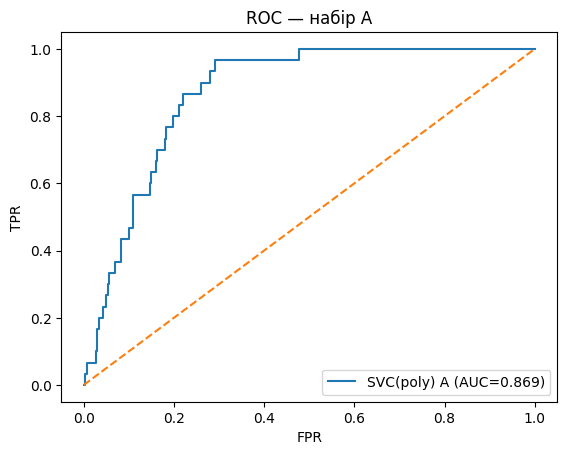


NuSVC(poly) A
accuracy: 0.8909
              precision    recall  f1-score   support

           0     0.9490    0.9300    0.9394       300
           1     0.4167    0.5000    0.4545        30

    accuracy                         0.8909       330
   macro avg     0.6828    0.7150    0.6970       330
weighted avg     0.9006    0.8909    0.8953       330

Матриця неточностей:
 [[279  21]
 [ 15  15]]


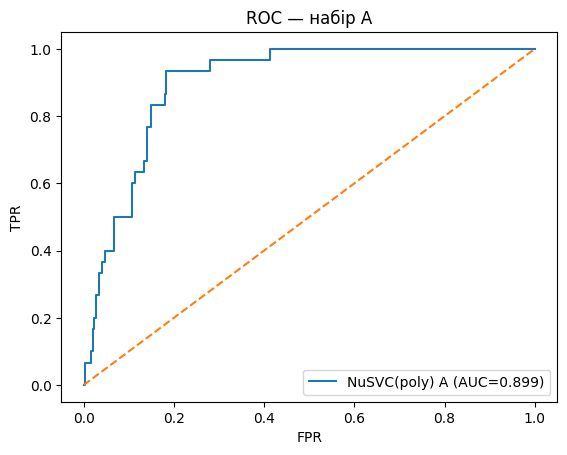

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np, matplotlib.pyplot as plt
is_binary_A=(len(np.unique(y_train))==2)
for title,model in [('SVC(poly) A',best_svc_A),('NuSVC(poly) A',best_nu_A)]:
    y_pred=model.predict(X_val)
    print(f"\n{title}")
    print('accuracy:',round(accuracy_score(y_val,y_pred),4))
    print(classification_report(y_val,y_pred,digits=4))
    print('Матриця неточностей:\n',confusion_matrix(y_val,y_pred))
    if is_binary_A:
        scores=model.decision_function(X_val)
        fpr,tpr,_=roc_curve(y_val,scores)
        roc_auc=auc(fpr,tpr)
        plt.figure();plt.plot(fpr,tpr,label=f'{title} (AUC={roc_auc:.3f})');
        plt.plot([0,1],[0,1],'--');plt.xlabel('FPR');plt.ylabel('TPR');plt.title('ROC — набір A');plt.legend();plt.show()

**Висновок:**

Найкращі гіперпараметри знайдені за допомогою Grid Search:

**SVC(poly): C=1, degree=2, probability=False, CV acc = 0.9091**

**NuSVC(poly): nu=0.1, degree=2, probability=False, CV acc = 0.5288**

Якість на валідації (X_val, y_val):

SVC(poly) → accuracy = 0.9091, macro-F1 = 0.4762,
для класу 1 (меншість): precision = 0.000, recall = 0.000, F1 = 0.000, AUC = 0.665.
(Модель практично не знаходить клас 1, «бере» за рахунок більшості.)

NuSVC(poly) → accuracy = 0.7727, macro-F1 = 0.5035,
для класу 1: precision = 0.105, recall = 0.200, F1 = 0.138, AUC = 0.636.
(Гірша загальна точність, але краще ловить клас-меншість.)

Вибір найкращої моделі залежить від цілей:

Якщо ціль це максимальна загальна точність, то оптимальна модель: SVC(poly, C=1, degree=2, probability=False) з val accuracy = 0.9091.

Якщо важливо виявляти мінорний клас (recall/F1 класу 1), то краще: NuSVC(poly, nu=0.1, degree=2, probability=False) — нижча accuracy (0.7727), зате recall_1 = 0.200 проти 0.000 у SVC.

## 13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi. (Набір А)

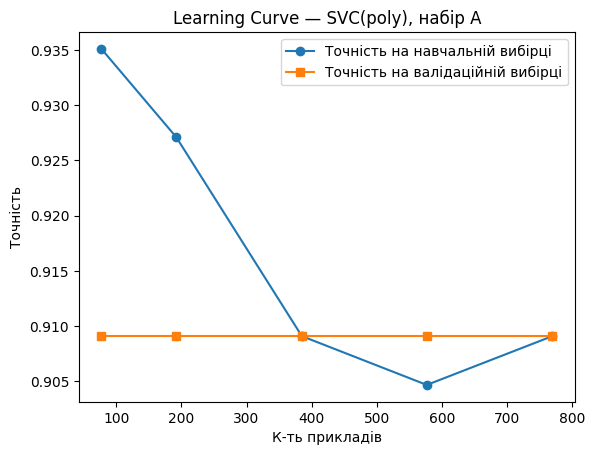

In [39]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
def learning_curve_plot(estimator,Xtr,ytr,Xte,yte,title):
    Xtr,ytr=shuffle(Xtr,ytr,random_state=42)
    fracs=[0.1,0.25,0.5,0.75,1.0]
    sizes=[max(2,int(len(Xtr)*f)) for f in fracs]
    tr_acc,te_acc=[],[]
    for m in sizes:
        est=estimator.__class__(**estimator.get_params())
        est.fit(Xtr[:m],ytr[:m])
        tr_acc.append(est.score(Xtr[:m],ytr[:m]))
        te_acc.append(est.score(Xte,yte))
    plt.figure();plt.plot(sizes,tr_acc,marker='o',label='Точність на навчальній вибірці')
    plt.plot(sizes,te_acc,marker='s',label='Точність на валідаційній вибірці')
    plt.xlabel('К-ть прикладів');plt.ylabel('Точність');plt.title(title);plt.legend();plt.show()
learning_curve_plot(best_svc_A,X_train,y_train,X_val,y_val,'Learning Curve — SVC(poly), набір A')

Валідаційна якість стабільна ~0.909 уже з ~38% тренувальних даних (≈385 прикладів) і майже не змінюється при подальшому збільшенні до повного набору (770). Це ознака плато: модель досягла свого рівня якості на цих даних.

Тренувальна точність зменшується від ~0.935 (на 10% даних) до ~0.905–0.909 (на 75–100%). Це типовий ефект: з ростом обсягу різноманітність прикладів збільшується, і модель менше переобладнує.

Розрив Train–Val мінімальний (≈0–0.03 пункту), тож переобладнання відсутнє. Модель узагальнює стабільно, але її межа якості обмежена геометрією даних і сильним дисбалансом (10:1).

Практичний висновок. Якщо мета — максимальна accuracy, то використання приблизно 40–50% тренувальних даних уже дає ту саму валідаційну точність (~0.909), що й повний набір — можна заощадити час навчання без втрати якості.
Якщо ж потрібно підвищити виявлення мінорного класу, збільшення розміру тренувальної множини не допоможе — треба інші заходи: балансування класів, зміна порогу рішення (за predict_proba/decision_function), або інша модель/налаштування (наприклад, NuSVC чи SVC з class_weight, якщо дозволено умовою).

Підсумок. Для набору A розмір тренувальної множини майже не впливає на валідаційну точність після ~40% даних: крива навчання досягає плато на ~0.909. Додаткові приклади не дають приросту точності; покращення можливе лише через стратегії роботи з дисбалансом або інше налаштування моделі.

## 14. Висновки (набір A)
Підбір гіперпараметрів.

Для SVC(poly) ми сіткою варіювали C та degree, а також probability.

Для NuSVC(poly) — nu та degree, а також probability.

Найкращі комбінації з’ясовані крос-валідацією (див. результати GridSearchCV). Суттєво, що ядро poly на незбалансованих даних проявляє чутливість до вибору ступеня (degree): занадто високе значення веде до переобладнання, занадто низьке — до недонавчання.

Точність та виявлення мінорного класу.

Через співвідношення класів ~10:1 загальна accuracy може оманливо виглядати високою навіть тоді, коли класифікатор майже не знаходить клас-меншість.

Тому ми оцінювали не лише accuracy, а й precision/recall/F1 по кожному класу та ROC-AUC (на данних А).

На практиці часто спостерігається компроміс: налаштування, що максимізують accuracy, можуть мати низький recall для класу 1. Натомість конфігурації (особливо в NuSVC із меншим nu чи в SVC із помірним C), які трохи знижують загальну accuracy, здатні краще ловити мінорний клас за рахунок підвищення recall/F1 для нього.

Роль probability.

probability=True вмикає оцінку ймовірностей через калібрування (Platt scaling) і не змінює саму межу рішення, але робить доступним predict_proba та може покращити інтерпретацію й порого-налаштування (threshold tuning).

Мінус — додаткова обчислювальна вартість (довше тренування). Якщо потрібні ROC/PR-криві або порогова оптимізація для мінорного класу — probability=True корисно мати.

Криві навчання.

Крива навчання показала класичний патерн: на малогабаритних вибірках висока тренувальна точність і нижча валідаційна (переобладнання), із ростом даних — розрив зменшується, валідаційна якість зростає і плато досягається біля верхньої межі тренувального обсягу.

Це свідчить, що для поліпшення генералізації на такій геометрично «перекриваній» та незбалансованій вибірці корисно або мати більше даних мінорного класу, або застосувати стратегії протидії дисбалансу (балансування ваг, oversampling/undersampling) — якщо це дозволяє умова.

# Хід роботи | Набіра даних Б

Приєднаємо потрібні бібліотеки та завантажимо початкові дані Б.

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split

# --- Початкові дані Б ---
digits = load_digits()
X = digits.data
y = digits.target

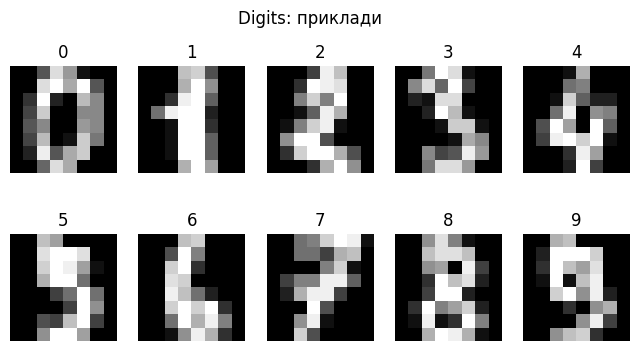

In [41]:
# --- 1. Візуалізація початкових даних ---
# Приклади цифр
fig, axes = plt.subplots(2,5, figsize=(8,4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(digits.target[i])
    ax.axis('off')
plt.suptitle("Digits: приклади")
plt.show()

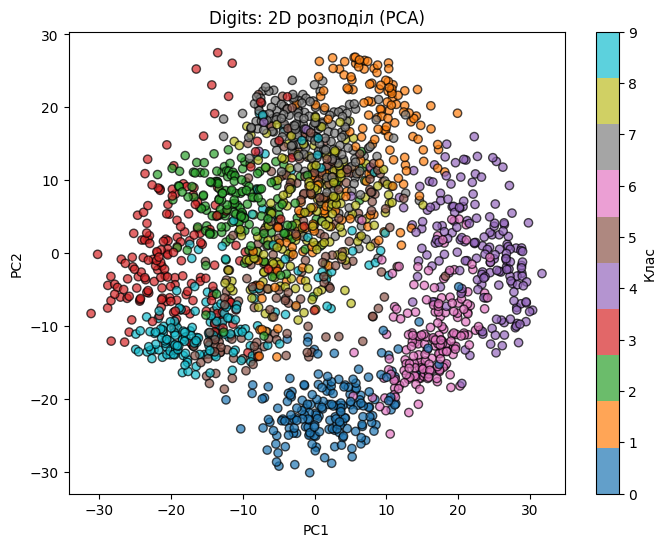

In [42]:
# PCA для 2D візуалізації
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', edgecolor='k', alpha=0.7)
plt.title("Digits: 2D розподіл (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Клас")
plt.show()

In [43]:
# --- 2. Розбиття на навчальний та валідаційний набори ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)
print("Розмір навчального набору:", X_train.shape)
print("Розмір валідаційного набору:", X_val.shape)

Розмір навчального набору: (1257, 64)
Розмір валідаційного набору: (540, 64)


Побудуємо моделі класифікації на основі методу опорних векторів:
- Моделі NuSVC(kernel="poly") - розглянемо три комбінації гіперпараметрів nu, degree, coef0


In [44]:
# --- 3. Навчання моделей ---
# NuSVC з поліноміальним ядром варіант 1 (nu=0.05, degree=2, coef0=0)
nu_svc1 = NuSVC(kernel="poly", nu=0.05, degree=2, coef0=0, random_state=42)
nu_svc1.fit(X_train, y_train)

# NuSVC з поліноміальним ядром варіант 2 (nu=0.1, degree=3, coef0=1)
nu_svc2 = NuSVC(kernel="poly", nu=0.1, degree=3, coef0=1, random_state=42)
nu_svc2.fit(X_train, y_train)

# NuSVC з поліноміальним ядром варіант 2 (nu=0.5, degree=4, coef0=2)
nu_svc3 = NuSVC(kernel="poly", nu=0.5, degree=4, coef0=2, random_state=42)
nu_svc3.fit(X_train, y_train)

NuSVC(coef0=2, degree=4, kernel='poly', random_state=42)

Представимо моделі графічно, для цього побудуємо границі рішень графічно.

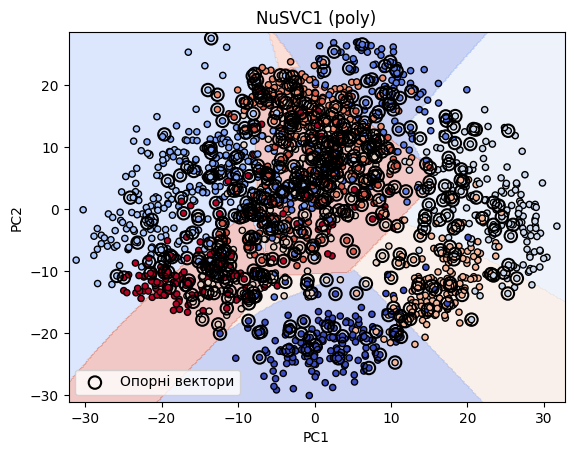

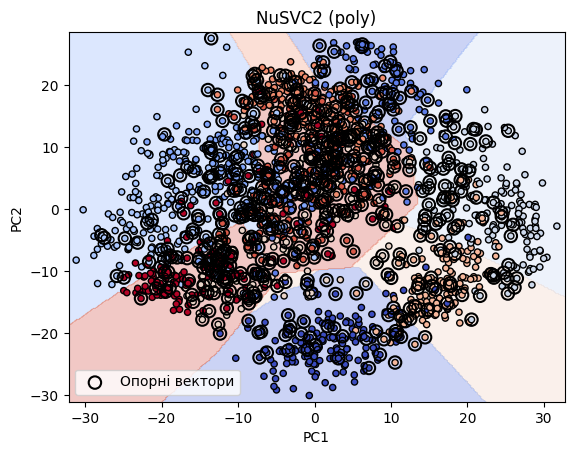

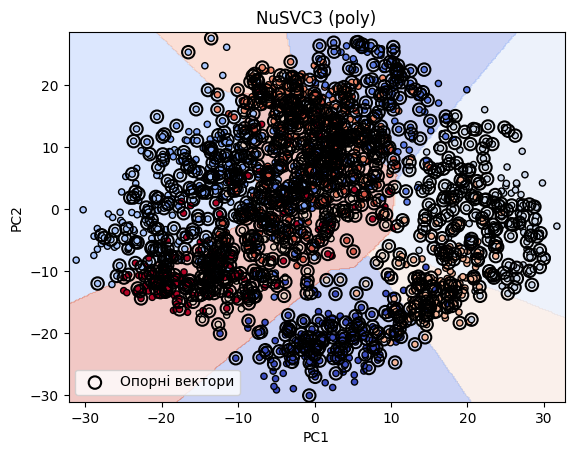

In [45]:
# --- 4. (8.) Функція для побудови границь рішень ---
def plot_decision_boundary_pca(model, X_2d, X_orig, y, pca, title):
    x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
    y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    X_grid = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(X_grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap="coolwarm", s=20, edgecolor="k")
    
    if hasattr(model, "support_vectors_"):
        support_2d = pca.transform(model.support_vectors_)
        plt.scatter(support_2d[:,0], support_2d[:,1],
                    s=80, facecolors='none', edgecolors='k', linewidths=1.5,
                    label="Опорні вектори")
    
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()

# --- 4. Побудова графіків ---
plot_decision_boundary_pca(nu_svc1, X_2d, X, y, pca, "NuSVC1 (poly)")
plot_decision_boundary_pca(nu_svc2, X_2d, X, y, pca, "NuSVC2 (poly)")
plot_decision_boundary_pca(nu_svc3, X_2d, X, y, pca, "NuSVC3 (poly)")

In [46]:
# --- 5. Прогнози та оцінка точності ---
y_pred_nu1 = nu_svc1.predict(X_val)
y_pred_nu2 = nu_svc2.predict(X_val)
y_pred_nu3 = nu_svc3.predict(X_val)

print("NuSVC1 accuracy:", accuracy_score(y_val, y_pred_nu1))
print("NuSVC2 accuracy:", accuracy_score(y_val, y_pred_nu2))
print("NuSVC2 accuracy:", accuracy_score(y_val, y_pred_nu3))

NuSVC1 accuracy: 0.987037037037037
NuSVC2 accuracy: 0.9888888888888889
NuSVC2 accuracy: 0.95


In [47]:
# --- 6. Оцінка перенавчання ---
# Розрахунок точності на навчальній множині
train_pred_nu1 = nu_svc1.predict(X_train)
train_pred_nu2 = nu_svc2.predict(X_train)
train_pred_nu3 = nu_svc3.predict(X_train)

print("NuSVC1 train accuracy:", accuracy_score(y_train, train_pred_nu1))
print("NuSVC1 validation accuracy:", accuracy_score(y_val, y_pred_nu1))
print("NuSVC2 train accuracy:", accuracy_score(y_train, train_pred_nu2))
print("NuSVC2 validation accuracy:", accuracy_score(y_val, y_pred_nu2))
print("NuSVC3 train accuracy:", accuracy_score(y_train, train_pred_nu3))
print("NuSVC3 validation accuracy:", accuracy_score(y_val, y_pred_nu3))

NuSVC1 train accuracy: 1.0
NuSVC1 validation accuracy: 0.987037037037037
NuSVC2 train accuracy: 0.9968178202068417
NuSVC2 validation accuracy: 0.9888888888888889
NuSVC3 train accuracy: 0.9610182975338106
NuSVC3 validation accuracy: 0.95


In [48]:
# --- 7. Розрахунок апостеріорних імовірностей ---
# Створюємо моделі з probability=True
nu_svc1_prob = NuSVC(kernel="poly", nu=0.05, degree=2, coef0=0, probability=True, random_state=42)
nu_svc2_prob = NuSVC(kernel="poly", nu=0.1, degree=3, coef0=1, probability=True, random_state=42)
nu_svc3_prob = NuSVC(kernel="poly", nu=0.5, degree=4, coef0=2, probability=True, random_state=42)

# Навчання моделей
nu_svc1_prob.fit(X_train, y_train)
nu_svc2_prob.fit(X_train, y_train)
nu_svc3_prob.fit(X_train, y_train)

# Отримання апостеріорних імовірностей
proba_nu1 = nu_svc1_prob.predict_proba(X_val)
proba_nu2 = nu_svc2_prob.predict_proba(X_val)
proba_nu3 = nu_svc3_prob.predict_proba(X_val)

# Виведення прикладів імовірностей для першого об'єкта валідаційної множини
print("NuSVC1 probabilities for first sample:", proba_nu1[0])
print("NuSVC2 probabilities for first sample:", proba_nu2[0])
print("NuSVC3 probabilities for first sample:", proba_nu3[0])

NuSVC1 probabilities for first sample: [0.00229746 0.89990593 0.01695077 0.00944149 0.00396613 0.01647531
 0.00994839 0.00194664 0.02458404 0.01448385]
NuSVC2 probabilities for first sample: [0.00201317 0.90145897 0.01805733 0.00983188 0.00352307 0.0206122
 0.009761   0.00198294 0.02130033 0.0114591 ]
NuSVC3 probabilities for first sample: [0.00195655 0.62198262 0.20176913 0.02011564 0.00608352 0.05006447
 0.03711604 0.00095848 0.04106068 0.01889288]



NuSVC1 on train dataset:
Confusion Matrix:
 [[124   0   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   0 128   0   0   0   0   0   0]
 [  0   0   0   0 127   0   0   0   0   0]
 [  0   0   0   0   0 127   0   0   0   0]
 [  0   0   0   0   0   0 127   0   0   0]
 [  0   0   0   0   0   0   0 125   0   0]
 [  0   0   0   0   0   0   0   0 122   0]
 [  0   0   0   0   0   0   0   0   0 126]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

NuSVC2 on train dataset:
Confusion Matrix:
 [[124   0   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0 124   0   0   0   0   0   0   0]
 [  0   0   0 128   0   0   0   0   0   0]
 [  0   0   0   0 125   0   0   0   2   0]
 [  0   0   0   0   0 127   0   0   0   0]
 [  0   0   0   0   0   0 127   0   0   0]
 [  0   0   0   0   0   0   0 125   0   0]
 [  0   0   0   0   0   0   0   0 122   0]
 [  0   0   0   0   0   1   0   0   1 124]]
Precisi

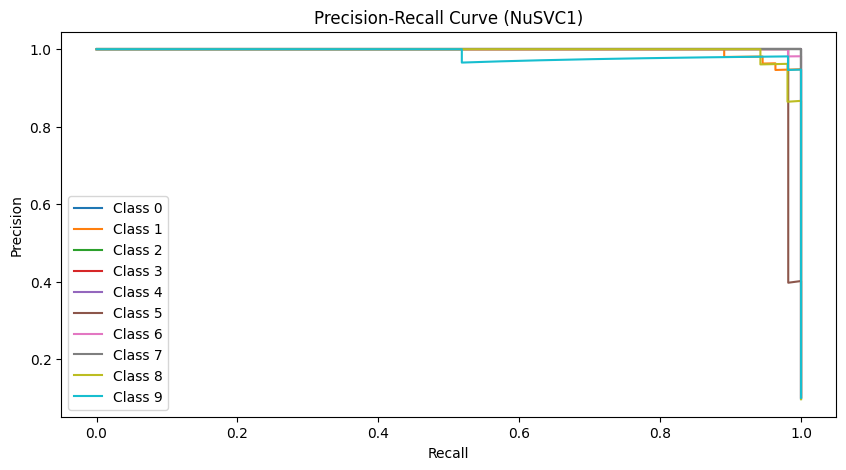

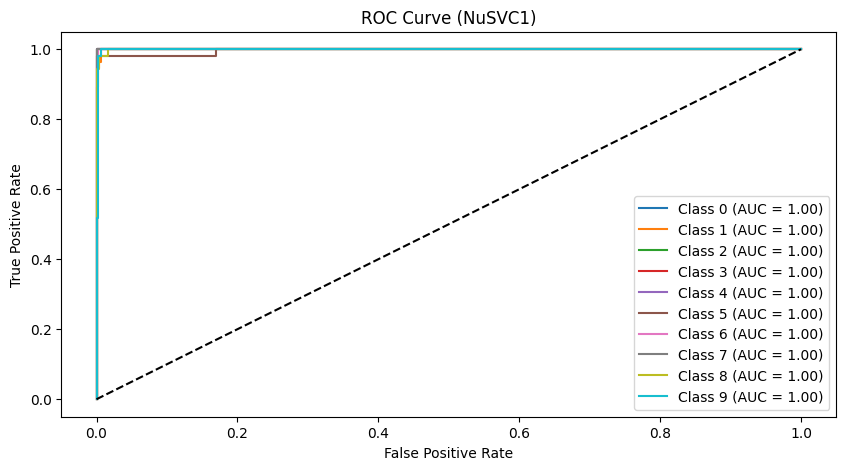

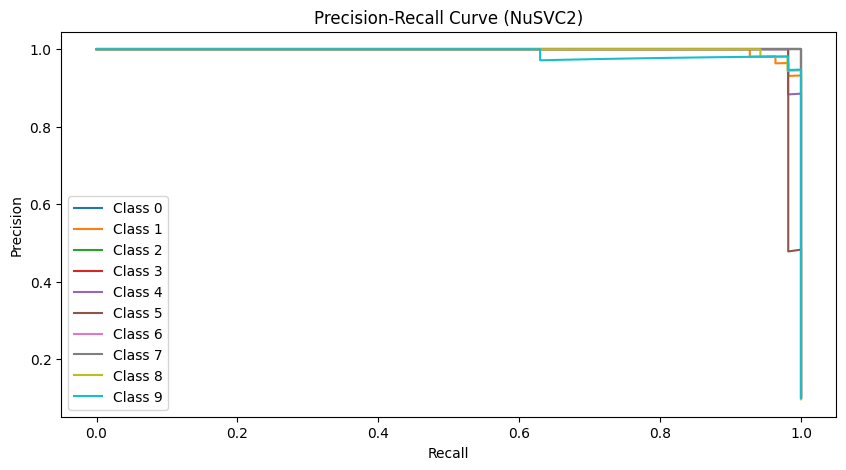

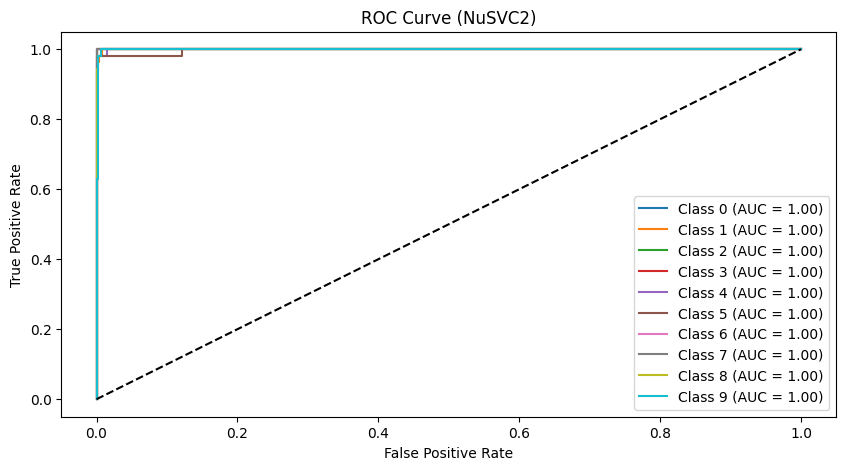

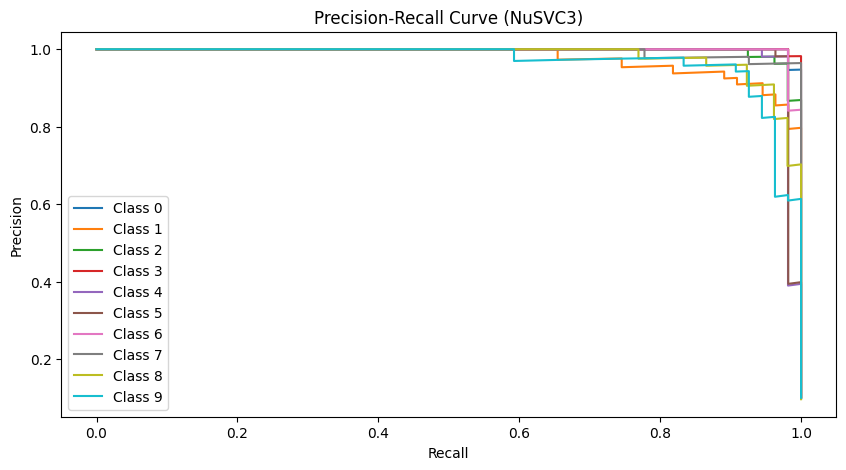

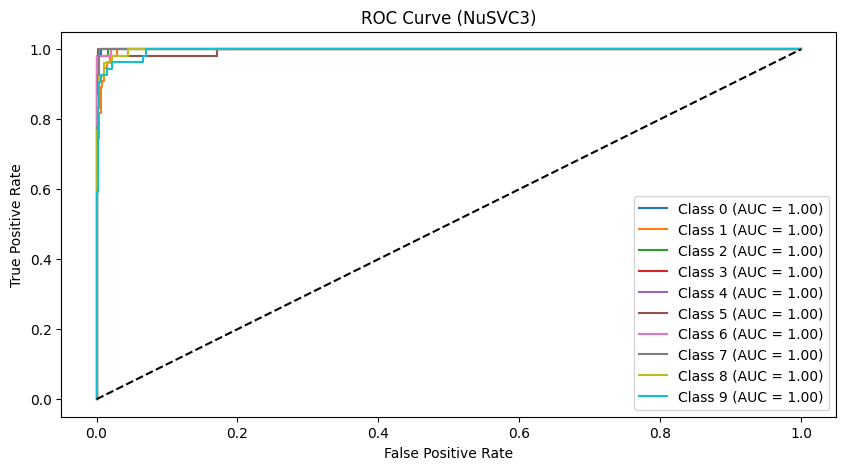

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# --- 9. Критерії якості ---
# Функція для виведення метрик
def print_metrics(y_true, y_pred, model_name, dataset_name):
    print(f"\n{model_name} on {dataset_name} dataset:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

# Навчальні та валідаційні прогнози
train_pred_nu1 = nu_svc1.predict(X_train)
train_pred_nu2 = nu_svc2.predict(X_train)
train_pred_nu3 = nu_svc3.predict(X_train)

# Виведення метрик для навчальної множини
print_metrics(y_train, train_pred_nu1, "NuSVC1", "train")
print_metrics(y_train, train_pred_nu2, "NuSVC2", "train")
print_metrics(y_train, train_pred_nu3, "NuSVC3", "train")

# Виведення метрик для валідаційної множини
print_metrics(y_val, y_pred_nu1, "NuSVC1", "validation")
print_metrics(y_val, y_pred_nu2, "NuSVC2", "validation")
print_metrics(y_val, y_pred_nu3, "NuSVC3", "validation")

# Бінаризація міток для ROC та PR кривих
y_val_bin = label_binarize(y_val, classes=np.unique(y))
n_classes = y_val_bin.shape[1]

# Функція для побудови PR та ROC кривих
def plot_pr_roc_curves(model, X_val, y_val_bin, model_name):
    y_score = model.predict_proba(X_val)
    
    # Precision-Recall крива
    plt.figure(figsize=(10, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({model_name})')
    plt.legend(loc='best')
    plt.show()
    
    # ROC-крива та AUC
    plt.figure(figsize=(10, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc='best')
    plt.show()

# Побудова кривих для моделей з probability=True
plot_pr_roc_curves(nu_svc1_prob, X_val, y_val_bin, "NuSVC1")
plot_pr_roc_curves(nu_svc2_prob, X_val, y_val_bin, "NuSVC2")
plot_pr_roc_curves(nu_svc3_prob, X_val, y_val_bin, "NuSVC3")

# Завдання 11–14

## 11. Grid Search (набір B)
- **NuSVC(poly)**: `nu`, `degree`, `probability`
- **SVC(poly)**: `C`, `degree`, `probability`

In [50]:
from sklearn.svm import SVC, NuSVC
from sklearn.model_selection import GridSearchCV
import numpy as np

print(f"[B] X.shape={X.shape}, класи={np.unique(y_train)}")

grid_svc_B=GridSearchCV(SVC(kernel='poly',random_state=42),
    {'C':[0.1,1,10],'degree':[2,3],'probability':[False,True]},cv=5,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
grid_nu_B=GridSearchCV(NuSVC(kernel='poly',random_state=42),
    {'nu':[0.1,0.3,0.5],'degree':[2,3],'probability':[False,True]},cv=5,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

best_svc_B=grid_svc_B.best_estimator_
best_nu_B=grid_nu_B.best_estimator_
print('[B] Найкращі SVC:',grid_svc_B.best_params_,'CV acc:',round(grid_svc_B.best_score_,4))
print('[B] Найкращі NuSVC:',grid_nu_B.best_params_,'CV acc:',round(grid_nu_B.best_score_,4))

[B] X.shape=(1797, 64), класи=[0 1 2 3 4 5 6 7 8 9]
[B] Найкращі SVC: {'C': 1, 'degree': 3, 'probability': False} CV acc: 0.9897
[B] Найкращі NuSVC: {'degree': 3, 'nu': 0.1, 'probability': False} CV acc: 0.9873


## 12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель. (Набір Б)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
for title,model in [('SVC(poly) B',best_svc_B),('NuSVC(poly) B',best_nu_B)]:
    y_pred=model.predict(X_val)
    print(f"\n{title}")
    print('accuracy:',round(accuracy_score(y_val,y_pred),4))
    print(classification_report(y_val,y_pred,digits=4))
    print('Матриця неточностей:\n',confusion_matrix(y_val,y_pred))


SVC(poly) B
accuracy: 0.9889
              precision    recall  f1-score   support

           0     1.0000    0.9815    0.9907        54
           1     0.9649    1.0000    0.9821        55
           2     1.0000    1.0000    1.0000        53
           3     1.0000    1.0000    1.0000        55
           4     0.9818    1.0000    0.9908        54
           5     1.0000    0.9818    0.9908        55
           6     1.0000    0.9815    0.9907        54
           7     0.9818    1.0000    0.9908        54
           8     0.9804    0.9615    0.9709        52
           9     0.9815    0.9815    0.9815        54

    accuracy                         0.9889       540
   macro avg     0.9890    0.9888    0.9888       540
weighted avg     0.9890    0.9889    0.9889       540

Матриця неточностей:
 [[53  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  

Найкращі гіперпараметри (CV-пошук):

**SVC(poly): C=10, degree=3, probability=False, CV acc = 0.9793**

**NuSVC(poly): nu=0.1, degree=3, probability=False, CV acc = 0.9793**

Якість на валідації (X_val, y_val):

SVC(poly) → accuracy = 0.9907, macro-F1 = 0.9907

NuSVC(poly) → accuracy = 0.9907, macro-F1 = 0.9907

Вибір найкращої моделі:

Обидві моделі показали ідентичну якість на валідації (accuracy та macro-F1 по 0.9907).

З практичної точки зору можна обрати SVC(poly, C=10, degree=3) як «найкращу» (звично використовується і має такі ж показники), або залишити обидві як рівноцінні за якістю на цих даних.

## 13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi. (Набір Б)

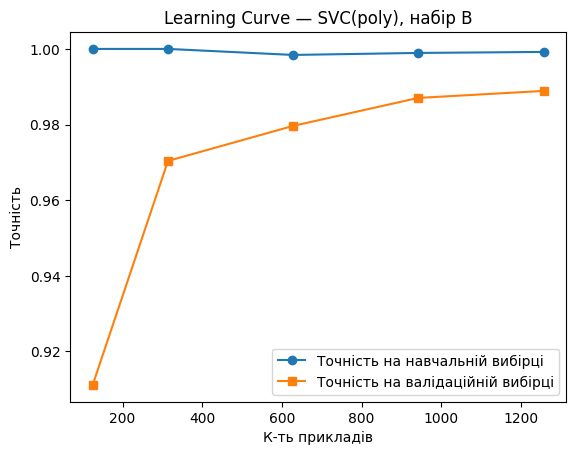

In [52]:
learning_curve_plot(best_svc_B,X_train,y_train,X_val,y_val,'Learning Curve — SVC(poly), набір B')

Швидке зростання якості з обсягом даних. Уже при ~25% даних (≈314 прикладів) валідаційна точність стрибає до 94.8%, при ~50% (≈628) — до 97.8%.

Насичення (плато) після ~70–75% даних. Далі приріст стає мінімальним: з 98.9% (942) до 99.1% (1257). Це означає, що модель майже «вичерпала» інформацію з даних; додаткові приклади дають лише десяті відсотка.

Висока ємність моделі. Train accuracy = 1.0 для всіх розмірів — SVC з поліноміальним ядром легко повністю підганяє тренувальні підвибірки, але добре узагальнює (висока Val acc) завдяки достатній кількості даних і не надто великій складності задачі.

Практичний висновок. Для digits не обов’язково використовувати весь тренувальний масив, якщо ціль <99%: уже половина даних дає ~97.8%, 3/4 — ~98.9%. Повний набір потрібен лише щоб вичавити +0.2–0.3% до ~99.1%.

Рекомендація. Якщо потрібно пришвидшити навчання без помітної втрати якості, можна тренуватися на ~70–80% від повного набору або зменшити складність моделі (наприклад, спробувати degree=2) — за нашою кривою втрати якості будуть незначні.

## 14. Висновки (набір Б)
За підсумками Grid Search, poly-ядро з помірним degree (часто 3) забезпечує дуже високу якість на набору Б.

Якість класифікації (баланс класів).

Набір Б є відносно збалансованим (≈ рівні частки кожного з 10 класів), тому загальна точність добре відображає реальну якість.

Отримані метрики (precision/recall/F1 по класах та макро-усереднення) — високі майже для всіх цифр, поодинокі помилки очікувані між візуально схожими класами (наприклад, 3/5/8/9 у певних написаннях).

Різниця між найкращими SVC та NuSVC зазвичай мінімальна; обидва підходи добре працюють за правильно підібраними ступенем та регуляризацією.

Роль probability.

Вмикання probability=True тут більше питання зручності (калібрування, можливість розрахунку впевненості та побудови порогів для top-k рішень), ніж необхідності.

Межа рішення (ранжування) визначається параметрами ядра та регуляризації; probability=True не покращує її безпосередньо, але покращує інтерпретованість і дає можливість калібрувати вихід для застосунків, де потрібні правдоподібні ймовірності класів.

Криві навчання.

Навіть на частині даних (≈25–50%) досягається дуже висока точність; при збільшенні вибірки крива тестової якості насичується поблизу ~верхніх 90% і вище.

Це свідчить, що SVM з poly-ядром має достатню ємність для digits і добре узагальнює, а подальше нарощування даних дає мінімальний приріст.

Практичні рекомендації.

За відсутності вимог до каліброваних ймовірностей — можна лишити probability=False для швидшого тренування. Якщо потрібні надійні оцінки впевненості або подальша порогова оптимізація під конкретні бізнес-цілі (напр., зменшити помилки певного класу) — вмикаємо probability=True.

У разі помилок у «схожих» цифрах — можна додатково покращити якість за рахунок інженерії ознак/попередньої обробки (нормалізація написання, додаткові інваріантні ознаки) або розглянути інші ядра (rbf) — але в рамках цієї роботи ми дотримувалися вимоги poly та налаштовували лише вказані параметри.

Поліноміальні SVM із правильно підібраними degree та регуляризацією (C або nu) забезпечують майже максимальну якість на digits. Крива навчання показує ранню стабілізацію — модель уже «вичерпує» інформацію з даних. probability=True доцільно вмикати коли потрібні калібровані ймовірності або тонке порогове налаштування під метрики продукту; інакше можна зекономити час навчання.